# 有监督算法

# 实验介绍及步骤

    实验介绍：本次实验我们将利用之前处理好的数据集类训练一个回归和分类模型，对评分的预测。
    实验步骤：首先我们用线性回归、SVM、KNN回归算法，训练三个回归模型。接下来我们会将评分数据离散化，用决策树模型训练分类模型。这样可以更好学习回归和分类算法的实现和评估。

In [1]:
#导入相关库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 数据集划分

In [50]:
#读取数据集
data_after_pca = pd.read_csv('after_pca.csv',index_col=0)
data = pd.read_csv('AppDataV2.csv',index_col=0)
data_after_var = pd.read_csv("data_after_var",index_col=0)
data_after_filter = pd.read_csv("df_after_filter.csv",index_col=0)

代码填空:

In [69]:
#首先确定样本的数据的标签
X = data.drop(["Rating"],axis='columns')
Y = data["Rating"]
X_var = data_after_var.drop(["Rating"],axis='columns')
Y_var = data_after_var["Rating"]
X_pca = data_after_pca.drop(["Rating"],axis='columns')
Y_pca = data_after_pca["Rating"]
X_filter = data_after_filter.drop(["Rating"],axis='columns')
Y_filter = data_after_filter["Rating"]

In [70]:
X = X_filter
Y = Y_filter

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10240 entries, 0 to 10239
Data columns (total 40 columns):
Reviews                         10240 non-null int64
Size                            10240 non-null float64
Installs                        10240 non-null float64
Type                            10240 non-null int64
Price                           10240 non-null float64
Content Rating                  10240 non-null int64
Genres                          10240 non-null int64
Category_ART_AND_DESIGN         10240 non-null int64
Category_AUTO_AND_VEHICLES      10240 non-null int64
Category_BEAUTY                 10240 non-null int64
Category_BOOKS_AND_REFERENCE    10240 non-null int64
Category_BUSINESS               10240 non-null int64
Category_COMICS                 10240 non-null int64
Category_COMMUNICATION          10240 non-null int64
Category_DATING                 10240 non-null int64
Category_EDUCATION              10240 non-null int64
Category_ENTERTAINMENT          10240

无量纲化
我们在特征选择先进行无量纲化。大多数机器学习算法中，会选择StandardScaler来进行特征缩放，因为MinMaxScaler对异常值非常敏感。在PCA，聚类，逻辑回归，支持向量机，神经网络这些算法中，StandardScaler往往是最好的选择。

MinMaxScaler在不涉及距离度量、梯度、协方差计算以及数据需要被压缩到特定区间时使用广泛，比如数字图像处理中量化像素强度时，都会使用MinMaxScaler将数据压缩于[0,1]区间之中。

因为这里我们选用StandardScaler。

In [53]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler(copy=False)
X = pd.DataFrame(sc_X.fit_transform(X))

In [54]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.260256,-0.086188,-0.173110,-0.060853,-0.453022,-1.610166,12.60952,-0.091489,-0.151582,-0.208344,...,-0.161725,-0.198185,-0.179025,-0.149205,-0.163622,-0.187842,-0.297964,-0.15259,-0.130705,-0.089847
1,-0.259277,-0.325793,-0.164460,-0.060853,-0.453022,-1.610166,12.60952,-0.091489,-0.151582,-0.208344,...,-0.161725,-0.198185,-0.179025,-0.149205,-0.163622,-0.187842,-0.297964,-0.15259,-0.130705,-0.089847
2,-0.154461,-0.579775,-0.085016,-0.060853,-0.453022,-1.610166,12.60952,-0.091489,-0.151582,-0.208344,...,-0.161725,-0.198185,-0.179025,-0.149205,-0.163622,-0.187842,-0.297964,-0.15259,-0.130705,-0.089847
3,0.000729,0.201339,0.709424,-0.060853,2.552773,-1.610166,12.60952,-0.091489,-0.151582,-0.208344,...,-0.161725,-0.198185,-0.179025,-0.149205,-0.163622,-0.187842,-0.297964,-0.15259,-0.130705,-0.089847
4,-0.259277,-0.862509,-0.171522,-0.060853,-0.453022,-1.610166,12.60952,-0.091489,-0.151582,-0.208344,...,-0.161725,-0.198185,-0.179025,-0.149205,-0.163622,-0.187842,-0.297964,-0.15259,-0.130705,-0.089847


In [55]:
X.iloc[30].std()

2.253332548362634

In [71]:
#数据集划分
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [72]:
#from sklearn.preprocessing import StandardScaler
#sc_X=StandardScaler()
#X_train=sc_X.fit_transform(X_train)
#X_test=sc_X.transform(X_test)

In [73]:
X

,Size,Installs,Reviews,0,1,2,3,4,5,6,...,20,21,22,23,24,25,26,27,28,29
0,159.0,19.000000,10000.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,967.0,14.000000,500000.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,87510.0,8.700000,5000000.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,215644.0,25.000000,50000000.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,967.0,2.800000,100000.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,167.0,5.600000,50000.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,178.0,19.000000,50000.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,36815.0,29.000000,1000000.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,13791.0,33.000000,1000000.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,121.0,3.100000,10000.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 回归算法

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,accuracy_score,r2_score

### 线性回归
sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True):

    fit_intercept：默认True，是否计算模型的截距，为False时，则数据中心化处理。
    normalize：默认False，是否中心化，或者使用sklearn.preprocessing.StandardScaler()。
    copy_X：默认True，否则X会被改写。

In [75]:
#初始化线性回归模型
linreg = LinearRegression()
#训练模型
linreg.fit(X_train,y_train)
#训练集上的MSE
linreg_pred_train = linreg.predict(X_train)
linreg_mse_train = mean_squared_error(linreg_pred_train,y_train)
#输出测试集上的测试结果
linreg_pred_test=linreg.predict(X_test)
linreg_mse_test = mean_squared_error(linreg_pred_test,y_test)

In [76]:
print("训练集MSE：", linreg_mse_train)
print("测试集MSE：", linreg_mse_test)

训练集MSE： 0.2308388846541144
测试集MSE： 0.22350603712434897


### SVM回归
sklearn.svm.SVR（kernel ='rbf'，degree = 3，gamma ='auto_deprecated'，coef0 = 0.0，tol = 0.001，C = 1.0，verbose = False，max_iter = -1 ）

    kernel：指定要在算法中使用的内核类型。可以是'linear'，'poly'，'rbf'，'sigmoid'，'precomputed'或者callable之一，默认为rbf。
    degree：多项式poly函数的维度，默认是3，选择其他核函数时会被忽略。
    gamma：‘rbf’,‘poly’ 和‘sigmoid’的核函数参数。默认是’auto’，则会选择1/n_features
    coef0：核函数的常数项。对于‘poly’和 ‘sigmoid’有用，默认值= 0.0。
    tol：停止训练的误差值大小，默认值= 1e-3。
    C：惩罚参数，默认= 1.0。
        C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强。
    verbose：日志。
    max_iter：最大迭代次数。-1为无限制。

In [125]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
#初始化决策树模型
svr=SVR(kernel='rbf',C=1)
#训练
svr.fit(X_train,y_train_int)
#训练集上的MSE
svr_pred_train = svr.predict(X_train)
svr_mse_train = mean_squared_error(svr_pred_train,y_train)
#输出测试集上的测试结果
svr_pred_test=svr.predict(X_test)
svr_mse_test = mean_squared_error(svr_pred_test,y_test)

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [126]:
print("训练集MSE：", svr_mse_train)
print("测试集MSE：", svr_mse_test)

训练集MSE： 0.28852538417710893
测试集MSE： 0.44229386180754227


### KNN回归
sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30)：

    n_neighbors：knn算法中指定以最近的几个最近邻样本具有投票权，默认参数为5
    algrithm：即内部采用什么算法实现。有以下几种选择参数：
        'ball_tree':球树、
        'kd_tree':kd树、
        'brute':暴力搜索、
        'auto':自动根据数据的类型和结构选择合适的算法。默认情况下是‘auto’。
        暴力搜索就不用说了大家都知道。具体前两种树型数据结构哪种好视情况而定。KD树是对依次对K维坐标轴，以中值切分构造的树,每一个节点是一个超矩形，在维数小于20时效率最高ball tree 是为了克服KD树高维失效而发明的，其构造过程是以质心C和半径r分割样本空间，每一个节点是一个超球体。一般低维数据用kd_tree速度快，用ball_tree相对较慢。超过20维之后的高维数据用kd_tree效果反而不佳，而ball_tree效果要好，具体构造过程及优劣势的理论大家有兴趣可以去具体学习。
        leaf_size:这个值控制了使用KD树或者球树时， 停止建子树的叶子节点数量的阈值。这个值越小，则生成的KD树或者球树就越大，层数越深，建树时间越长，反之，则生成的KD树或者球树会小，层数较浅，建树时间较短。默认是30.


请大家根据线性回归的实现和KNN的参数说明，训练一个KNN模型。代码填写：

In [79]:
#初始化knn模型
knn_model = KNeighborsRegressor(n_neighbors=50)
#训练
knn_model.fit(X_train,y_train)
#训练集上的MSE
knn_pred_train = knn_model.predict(X_train)
knn_mse_train = mean_squared_error(knn_pred_train,y_train)
#输出测试集上的测试结果
knn_pred_test=knn_model.predict(X_test)
knn_mse_test = mean_squared_error(knn_pred_test,y_test)

In [80]:
print("训练集MSE：", knn_mse_train)
print("测试集MSE：", knn_mse_test)

训练集MSE： 0.2044843076171875
测试集MSE： 0.20693282421875


In [81]:
knn_model.predict(X_test[0:50])

array([4.042, 4.324, 4.11 , 4.236, 4.452, 3.864, 4.27 , 4.276, 4.09 ,
       4.188, 4.196, 4.228, 3.862, 3.874, 4.25 , 4.378, 4.17 , 4.026,
       4.142, 4.27 , 4.156, 4.312, 3.752, 4.226, 4.338, 4.244, 4.362,
       4.238, 4.358, 4.416, 4.442, 4.222, 4.358, 4.2  , 3.966, 4.466,
       4.202, 3.914, 4.12 , 4.274, 4.402, 4.284, 3.74 , 4.126, 3.952,
       4.018, 4.192, 4.388, 4.19 , 4.388])

In [82]:
model_mse = pd.DataFrame(data=[[linreg_mse_train,knn_mse_train,svr_mse_train],
                                 [linreg_mse_test,knn_mse_test,svr_mse_test]],
        columns=['Logistic_Regression','knn','SVR'],index=["training set","test set"])
model_mse

,Logistic_Regression,knn,SVR
training set,0.230839,0.204484,0.270277
test set,0.223506,0.206933,0.494534


<Figure size 1440x720 with 0 Axes>

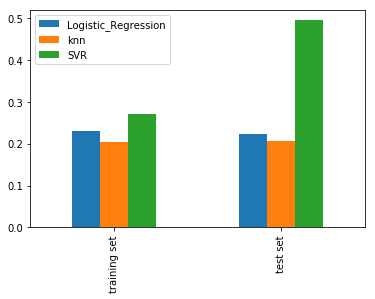

In [83]:
plt.figure(figsize=(20, 10))
model_mse.plot(kind = 'bar')

下面我们将数据的标签变为整型，训练一个决策树分类模型。

### 决策树分类

DecisionTreeClassifie(criterion="mse",splitter="best",max_depth=None,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.,
max_features=None,random_state=None,max_leaf_nodes=None)

    criterion:切分质量的评价准则。默认为'mse'(mean squared error)。
    splitter:指定了在每个节点切分的策略。有两种切分策略：
            (1).splitter='best':表示选择最优的切分特征和切分点。
            (2).splitter='random':表示随机切分。
    max_depth:指定树的最大深度。如果为None，则表示树的深度不限，直到每个叶子都是纯净的。
    min_samples_split:默认为2。它指定了分裂一个内部节点(非叶子节点)需要的最小样本数。如果为浮点数(0到1之间)，最少样本分割数为ceil(min_samples_split * n_samples)
    min_samples_leaf:指定了每个叶子节点包含的最少样本数。如果为浮点数(0到1之间)，每个叶子节点包含的最少样本数为ceil(min_samples_leaf * n_samples)
    min_weight_fraction_leaf:指定了叶子节点中样本的最小权重系数。默认情况下样本有相同的权重。
    max_feature:
             (1).如果是整数，则每次节点分裂只考虑max_feature个特征。
             (2).如果是浮点数(0到1之间)，则每次分裂节点的时候只考虑int(max_features * n_features)个特征。
             (3).如果是字符串'auto',max_features=n_features。
             (4).如果是字符串'sqrt',max_features=sqrt(n_features)。
             (5).如果是字符串'log2',max_features=log2(n_features)。
             (6).如果是None，max_feature=n_feature。
    random_state:随机数生成器
    max_leaf_nodes:
             (1).如果为None，则叶子节点数量不限。
             (2).如果不为None，则max_depth被忽略。

代码填写：

In [95]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)
y_train_int.head()

2077    4
4387    3
8974    4
8189    4
6541    4
Name: Rating, dtype: int32

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
#初始化决策树模型
dtree=DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=42)
#训练
dtree.fit(X_train,y_train_int)
#训练集上的MSE
dtree_pred_train = dtree.predict(X_train)
dtree_mse_train = dtree.score(X_train,y_train_int)
#输出测试集上的测试结果
dtree_pred_test=dtree.predict(X_test)
dtree_mse_test =dtree.score(X_test,y_test_int)

In [98]:
print("训练集MSE：", dtree_mse_train)
print("测试集MSE：", dtree_mse_test)

训练集MSE： 0.793701171875
测试集MSE： 0.7890625


以上就是回归和分类模型的实现方式。

# 模型评估与选择

通过上面的对比，我们可以看出4个模型都欠拟合的状态。接下来我们将使用交叉验证、网格搜索和随机搜索的方式，选择模型的超参数。

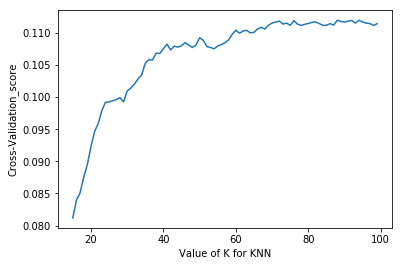

In [136]:
from sklearn.model_selection import cross_val_score # K折交叉验证模块

#建立测试参数集
k_range = range(15, 100)

k_scores = []

#藉由迭代的方式来计算不同参数对模型的影响，并返回交叉验证后的平均准确率
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10)#r2 score
    k_scores.append(scores.mean())

#可视化数据
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation_score')
plt.show()

In [112]:
###1、决策树分类器
from sklearn.model_selection import GridSearchCV

params = [{'criterion':['gini'],'max_depth':[30,50,60,100],'min_samples_leaf':[2,3,5,10],'min_impurity_decrease':[0.1,0.2,0.5]},
         {'criterion':['gini','entropy']},
         {'max_depth': [30,60,100], 'min_impurity_decrease':[0.1,0.2,0.5]}]


best_model = GridSearchCV(dtree, param_grid=params,cv = 5,scoring ="accuracy")
best_model.fit(X_train,y_train_int)
print('最优分类器:',best_model.best_params_,'最优分数:', best_model.best_score_)  # 得到最优的参数和分值

最优分类器: {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} 最优分数: 0.781982421875


In [91]:
best_model.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['gini'], 'max_depth': [30, 50, 60, 100], 'min_samples_leaf': [2, 3, 5, 10], 'min_impurity_decrease': [0.1, 0.2, 0.5]}, {'criterion': ['gini', 'entropy']}, {'max_depth': [30, 60, 100], 'min_impurity_decrease': [0.1, 0.2, 0.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)>

In [128]:
from sklearn.model_selection import RandomizedSearchCV

params_svr = {'kernel': ['rbf'], 'C': np.logspace(-3, 2, 6), 'gamma':np.arange(0,10,2)}
best_svr_model = RandomizedSearchCV(svr, param_distributions=params_svr,cv = 3,scoring ="neg_mean_squared_error")
best_svr_model.fit(X,Y)
print('最优分类器:',best_svr_model.best_params_,'最优分数:', best_svr_model.best_score_)  # 得到最优的参数和分值

最优分类器: {'kernel': 'rbf', 'gamma': 4, 'C': 1.0} 最优分数: -0.24169698734960568
